<a href="https://colab.research.google.com/github/Amaresh-bot/simple-linear-regression/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
class my_own_LR:

  def __init__(self):
    self.m = None
    self.b = None

  def fit(self,X_train,Y_train):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):

     num = num + ((X_train[i] - X_train.mean()) * (Y_train[i] - Y_train.mean()))
     den = den + (((X_train[i] - X_train.mean()))*(X_train[i] - X_train.mean()))

    self.m = num/den
    self.b = Y_train.mean() - (self.m * X_train.mean())
    print(self.m)
    print(self.b)

  def predict(self,X_test):
    print(X_test)
    return self.m * X_test + self.b

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import google.colab as colab
colab.files.upload()

Saving placement.csv to placement.csv


{'placement.csv': b'cgpa,package\r\n6.89,3.26\r\n5.12,1.98\r\n7.82,3.25\r\n7.42,3.67\r\n6.94,3.57\r\n7.89,2.99\r\n6.73,2.6\r\n6.75,2.48\r\n6.09,2.31\r\n8.31,3.51\r\n5.32,1.86\r\n6.61,2.6\r\n8.94,3.65\r\n6.93,2.89\r\n7.73,3.42\r\n7.25,3.23\r\n6.84,2.35\r\n5.38,2.09\r\n6.94,2.98\r\n7.48,2.83\r\n7.28,3.16\r\n6.85,2.93\r\n6.14,2.3\r\n6.19,2.48\r\n6.53,2.71\r\n7.28,3.65\r\n8.31,3.42\r\n5.42,2.16\r\n5.94,2.24\r\n7.15,3.49\r\n7.36,3.26\r\n8.1,3.89\r\n6.96,3.08\r\n6.35,2.73\r\n7.34,3.42\r\n6.87,2.87\r\n5.99,2.84\r\n5.9,2.43\r\n8.62,4.36\r\n7.43,3.33\r\n9.38,4.02\r\n6.89,2.7\r\n5.95,2.54\r\n7.66,2.76\r\n5.09,1.86\r\n7.87,3.58\r\n6.07,2.26\r\n5.84,3.26\r\n8.63,4.09\r\n8.87,4.62\r\n9.58,4.43\r\n9.26,3.79\r\n8.37,4.11\r\n6.47,2.61\r\n6.86,3.09\r\n8.2,3.39\r\n5.84,2.74\r\n6.6,1.94\r\n6.92,3.09\r\n7.56,3.31\r\n5.61,2.19\r\n5.48,1.61\r\n6.34,2.09\r\n9.16,4.25\r\n7.36,2.92\r\n7.6,3.81\r\n5.11,1.63\r\n6.51,2.89\r\n7.56,2.99\r\n7.3,2.94\r\n5.79,2.35\r\n7.47,3.34\r\n7.78,3.62\r\n8.44,4.03\r\n6.85,3.44\r\

In [5]:
df = pd.read_csv('placement.csv')

In [6]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [7]:
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

In [8]:
X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [9]:
Y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Text(0, 0.5, 'package(in lpa)')

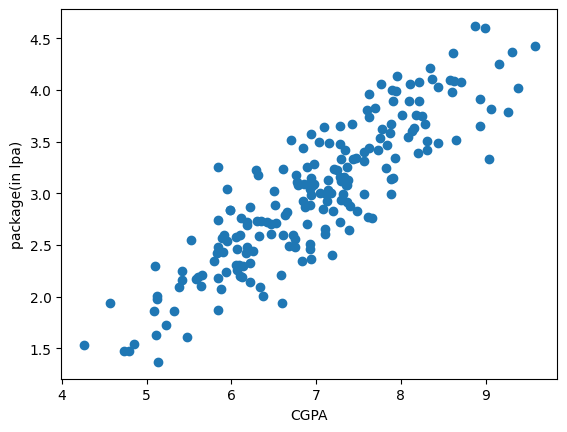

In [19]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('package(in lpa)')

In [12]:
lr = my_own_LR()

In [13]:
lr.fit(X_train,Y_train)

0.5579519734250721
-0.8961119222429152


In [14]:
X_test[0]

np.float64(8.58)

In [15]:
print(lr.predict(X_test[0]))

8.58
3.891116009744203


[7.14 8.93 5.42 5.1  7.77 6.76 6.89 6.68 7.91 7.89 8.71 7.95 6.61 6.26
 6.53 6.42 5.11 6.09 6.93 7.04 5.94 6.05 5.83 5.95 9.31 5.58 7.88 6.13
 7.76 4.85 6.19 8.6  6.07 7.18 5.12 7.39 8.25 8.28 7.13 7.35 5.66 5.99
 8.01 7.14 6.34 6.89 5.42 6.47 7.69 7.4  7.28 5.95 7.38 6.93 8.99 7.36
 7.08 5.38 7.56 8.22 5.84 6.78 7.19 7.28 6.79 6.12 6.85 8.2  6.84 7.37
 6.22 6.61 5.23 7.21 6.85 6.19 7.3  6.17 5.89 8.09 7.11 4.26 6.94 5.98
 6.71 7.33 9.06 6.1  5.48 6.1  7.56 7.29 5.84 7.48 7.61 5.79 5.61 7.34
 9.38 7.91 6.94 7.94 8.31 6.96 6.93 7.11 8.44 8.18 6.66 8.44 7.12 6.3
 5.84 6.98 7.63 5.64 7.43 8.87 7.84 5.84 9.58 8.37 7.63 6.31 6.5  8.11
 6.07 4.73 7.3  6.51 7.28 6.92 6.35 8.62 7.05 9.26 6.33 6.22 6.94 5.13
 8.13 5.9  9.04 6.06 7.57 8.1  9.16 5.84 7.89 6.63 7.09 5.53 6.75 7.62
 6.97 7.66 6.14 7.78 7.25 8.65]


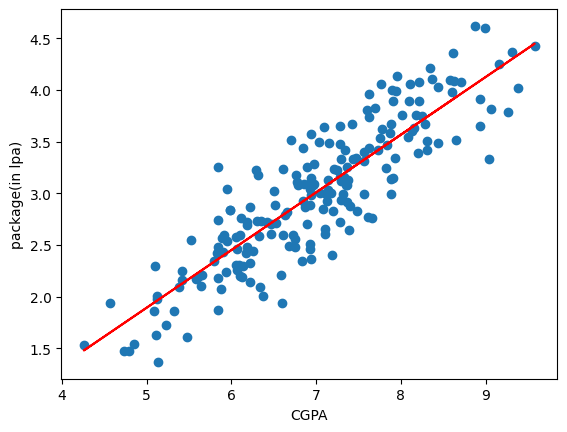

In [18]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('package(in lpa)')
plt.plot(X_train,lr.predict(X_train),color = 'RED')